<a href="https://colab.research.google.com/github/CypherTyphoon/Machine-KI_Learning/blob/main/Tag_7_Mittwoch_10042024_Vormittag_MarkusVorgabe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
df_segmentation  = pd.read_csv('segmentation_data.csv', index_col=0)
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [ ]:
scaler=StandardScaler()
segmentation_std= scaler.fit_transform(df_segmentation)

In [ ]:
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

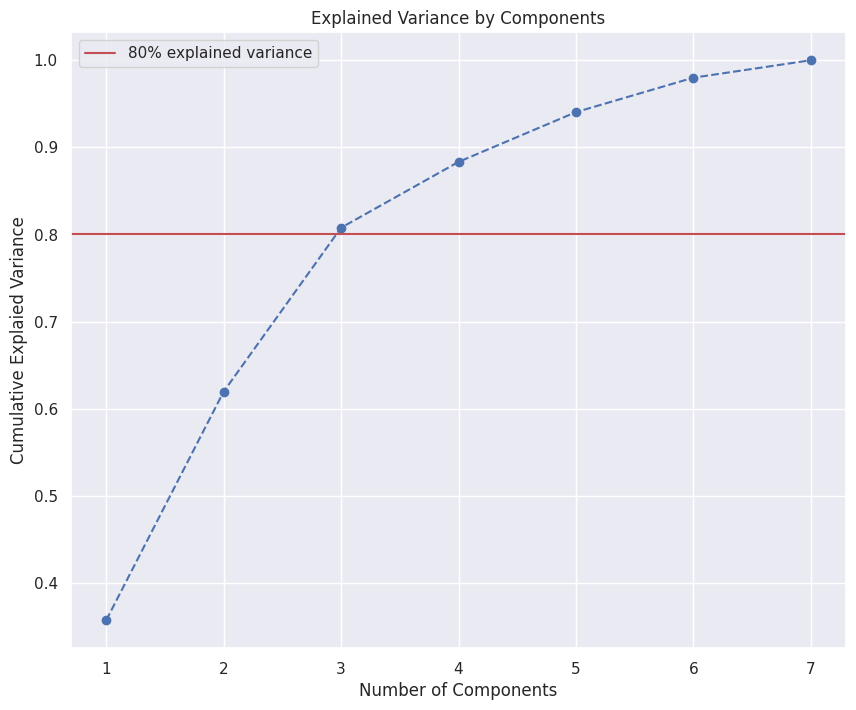

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explaied Variance')

# Hinzufügen einer horizontalen Linie bei y=0.8
plt.axhline(y=0.8, color='r', linestyle='-', label='80% explained variance')
plt.legend()

plt.show()

In [ ]:
pca=PCA(n_components = 3)
pca.fit(segmentation_std)

pca.transform(segmentation_std)

scores_pca = pca.transform(segmentation_std)

In [ ]:
wcss = []
for i in range (1,21):
  kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

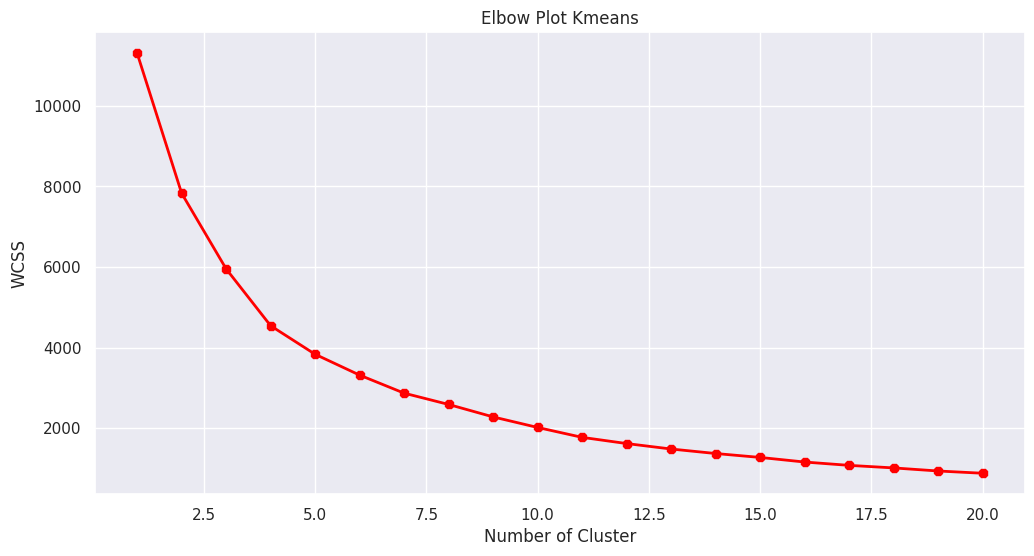

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,21),wcss, linewidth=2, color="red", marker ="8")
plt.title('Elbow Plot Kmeans')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop=True), pd.DataFrame(scores_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-3:] = ['Component1','Component2','Component3']
df_segm_pca_kmeans ['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component1,Component2,Component3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1


In [ ]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'first',1:'second',2:'third',3:'fourth'})

<function matplotlib.pyplot.show(close=None, block=None)>

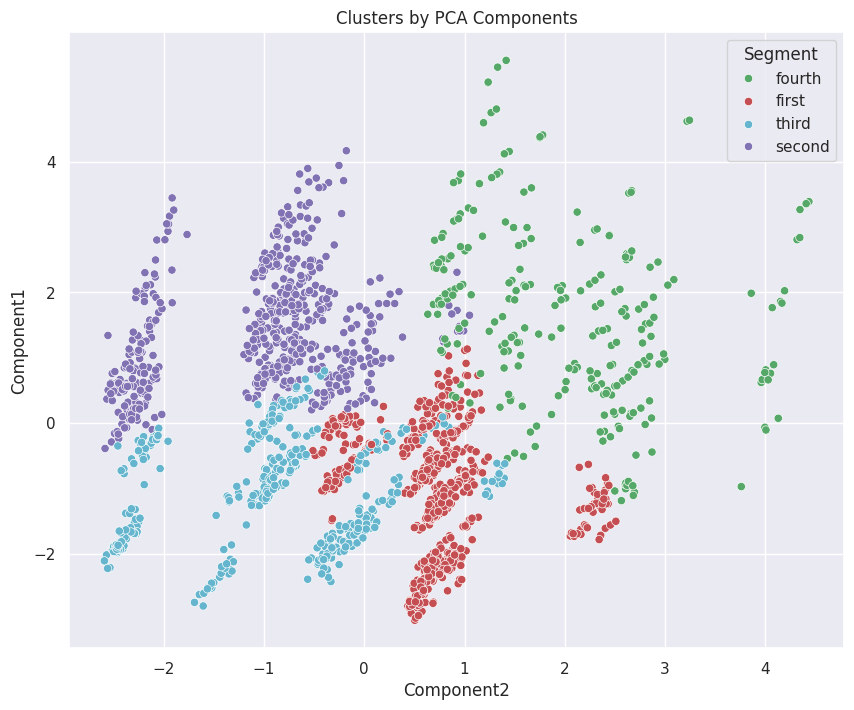

In [ ]:


x_axis= df_segm_pca_kmeans['Component2']
y_axis = df_segm_pca_kmeans['Component1']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['g','r','c','m'])
plt.title('Clusters by PCA Components')
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

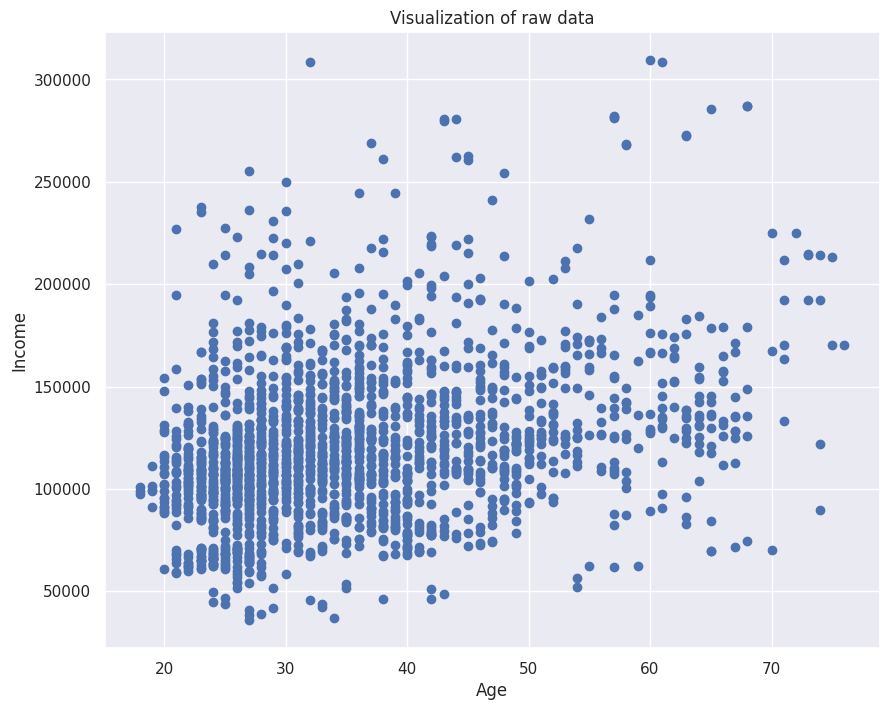

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df_segmentation.iloc[:,2],df_segmentation.iloc[:,4])
plt.title('Visualization of raw data')
plt.ylabel('Income')
plt.xlabel('Age')
plt.show
